# Analisis Exploratorio Datos Properati

In [4]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (15, 5)

prop = pd.read_csv('datosCabaYGBA.csv', low_memory=False)



In [6]:
#vemos la forma en que se muestran los datos
prop.tail()

,Unnamed: 0,created_on,description,expenses,extra,floor,geonames_id,id,lat-lon,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
186168,458068,2015-12-22,VENTA MONOAMBIENTE EN PALERMO.Excelente monoa...,NaN,NaN,NaN,3430234.0,abb096c6136032841db90288e42338e20ee3884d,"-34.5745750574,-58.4216696685",Palermo,|Argentina|Capital Federal|Palermo|,155000.0,4305.555556,apartment,1.0,Capital Federal,NaN,36.0,DEPARTAMENTO EN VENTA
186169,458069,2015-11-21,Departamento 1 AMBIENTE en BelgranoAv. Cramer ...,2000.0,NaN,4.0,3436077.0,1741bb5a066a47cced6bbaffadeb4ebc3ac91046,"-34.5591943,-58.4661081",Belgrano,|Argentina|Capital Federal|Belgrano|,98000.0,2722.222222,apartment,1.0,Capital Federal,35.0,36.0,DEPARTAMENTO EN VENTA
186170,458070,2016-03-23,"CASAMUY LINDA,COMODA Y RECIEN PINTADADOS DORM-...",NaN,NaN,NaN,NaN,40a16bc3e39b956e023cbf6f7e68d224854ce4d3,"-34.5168081,-58.7342253",José C Paz,|Argentina|Bs.As. G.B.A. Zona Norte|José C Paz|,72000.0,0.000000,house,NaN,Bs.As. G.B.A. Zona Norte,NaN,0.0,CASA-TRES AMB-PATIO Y GARAGE PARA DOS VEHICULO...
186171,458071,2016-02-23,* * * * * * 2 DEPARTAMENTOS DE 4 AMB Y 3 AMB U...,NaN,NaN,NaN,3430114.0,c55cb52da723c1183f27d3e7a3acc24d89eef8bd,"-34.6371728,-58.4074997",Parque Patricios,|Argentina|Capital Federal|Parque Patricios|,280000.0,1647.058824,house,7.0,Capital Federal,153.0,170.0,2 DEPARTAMENTOS DE 4 AMB Y 3 AMB UNIFICADOS
186172,458072,2016-02-05,Dpto 1205Condominio Aston Village (Chubut y Rt...,NaN,NaN,NaN,3429979.0,d69976e8a5afac6ef9fa0dbd4ae1bcf8c79060aa,"-34.4300389601,-58.8824195961",Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,90000.0,1200.000000,apartment,2.0,Bs.As. G.B.A. Zona Norte,65.0,75.0,"Condominio Aston Village, Pilar - Dpto 2 ambie..."


In [8]:
#los tipos de datos de cada columna
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186173 entries, 0 to 186172
Data columns (total 19 columns):
Unnamed: 0                 186173 non-null int64
created_on                 186173 non-null object
description                160184 non-null object
expenses                   23644 non-null object
extra                      1876 non-null object
floor                      21334 non-null float64
geonames_id                148906 non-null float64
id                         158316 non-null object
lat-lon                    134997 non-null object
place_name                 186128 non-null object
place_with_parent_names    186173 non-null object
price_aprox_usd            173012 non-null float64
price_usd_per_m2           125287 non-null float64
property_type              186173 non-null object
rooms                      99725 non-null float64
state_name                 158316 non-null object
surface_covered_in_m2      138464 non-null float64
surface_total_in_m2        134629 non-n

# ¿cuales son los barrios mas costosos de cada zona?

In [12]:
#¿cual es la zona mas costosa en promedio?
zonas = prop[['state_name','price_aprox_usd']].groupby('state_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False)
zonas

,price_aprox_usd
state_name,
Bs.As. G.B.A. Zona Norte,316476.546458
Capital Federal,257909.273356
Bs.As. G.B.A. Zona Sur,179294.325941
Bs.As. G.B.A. Zona Oeste,149316.371420


In [16]:
#¿barrios mas costosos Capital Federal?
capital = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_cap = capital[['state_name','place_name','price_aprox_usd']][capital['state_name']=="Capital Federal"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_cap

,price_aprox_usd
place_name,
Palermo Chico,922739.562827
Puerto Madero,849971.825751
Capital Federal,423571.862961
Retiro,413651.312188
Recoleta,409644.423149
Belgrano,352063.091362
Palermo Viejo,343742.485204
Las Cañitas,327593.704762
Palermo,323715.983957


In [18]:
#lo que es observa es que desde la zona de retiro hacia el noreste los barios mas cercanos al rio tienden a estar entre
#los mas costosos de Capital Federal

In [20]:
#¿barrios mas costosos zona norte?
zonanorte = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_nor = zonanorte[['state_name','place_name','price_aprox_usd']][zonanorte['state_name']=="Bs.As. G.B.A. Zona Norte"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_nor

,price_aprox_usd
place_name,
San Isidro Chico,1.508000e+06
Bahía del Sol,1.374000e+06
The Boating Club,1.190000e+06
Barrio La Isla,1.043422e+06
El Talar de Pacheco,1.033023e+06
Pacheco Golf Club,1.003478e+06
Barrio El Yacht,9.987500e+05
Barrio Cabos del Lago,9.693333e+05
Barrio Lagos del Golf 1,9.000000e+05


In [23]:
#¿barrios mas costosos zona sur?
zonasur = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_sur = zonasur[['state_name','place_name','price_aprox_usd']][zonasur['state_name']=="Bs.As. G.B.A. Zona Sur"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_sur

,price_aprox_usd
place_name,
Grand Bell,880000.000000
Abril Club de Campo,685147.058824
Country Nuevo Quilmes,612125.000000
Pereyra,499000.000000
Las Golondrinas,487500.000000
Country Saint Thomas,485795.000000
Santa Juana,450000.000000
Terralagos,450000.000000
El Rocío,440937.500000


In [26]:
#¿barrios mas costosos zona oeste?
zonaoeste = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_oes = zonaoeste[['state_name','place_name','price_aprox_usd']][zonaoeste['state_name']=="Bs.As. G.B.A. Zona Oeste"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_oes

,price_aprox_usd
place_name,
Cruce Castelar,795000.000000
El Casco de Leloir,569230.769231
Campos de Álvarez,533780.487805
Terravista Barrio Privado,512800.000000
San Diego Country Club,463000.000000
Barrio Privado Altos del Sol,427875.000000
Barrio cerrado Santa Ana,411000.000000
"Barrio Cerrado ""El Casco de Moreno""",379000.000000
Los Pingüinos Country Club,375000.000000


In [27]:
#observamos que los barrios con mayor cercania al rio, o los barrios privados tiendenn a ser los mas costosos de cada 
#zona 

# analizando datos de departamentos

In [57]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de capital
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Capital Federal"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Palermo Chico,658229.629630
Puerto Madero,525671.739130
Las Cañitas,316308.333333
Recoleta,304363.254670
Belgrano,257639.959919
Nuñez,230172.582732
Palermo,229292.277116
Retiro,227592.941176
Barrio Norte,221488.052500


In [58]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de zona norte
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Bs.As. G.B.A. Zona Norte"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Barrio El Golf,365000.000000
La Lucila,333636.360294
Pilar Golf Country Club,320000.000000
Florida,305380.851064
Vicente López,300869.882576
Acassuso,295315.994627
Olivos,283897.971020
Martínez,254646.941645
Barrio Los Castores,249000.000000


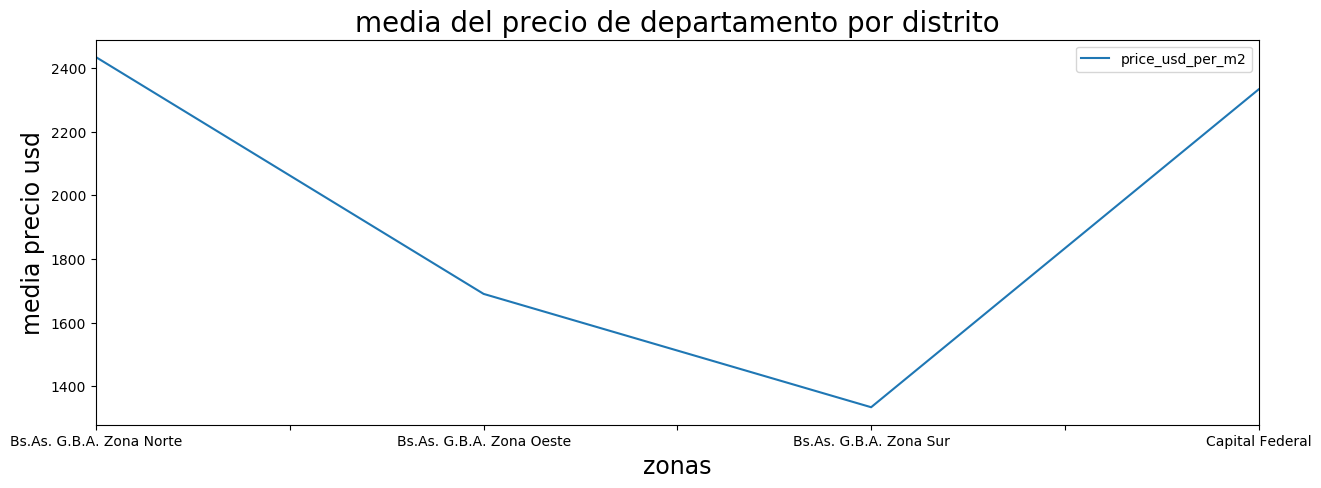

In [98]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['floor'])
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&menos100&mas15][['place_name','price_usd_per_m2','floor','state_name']]
res.groupby('state_name').agg({'price_usd_per_m2':'mean'}).plot()
plt.title('media del precio de departamento por distrito', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);


In [60]:
#en el grafico podemos observar que los distritos de capital y zona norte son los que poseen
#los departamentos mas costosos con medias de mas 2000usd/m2

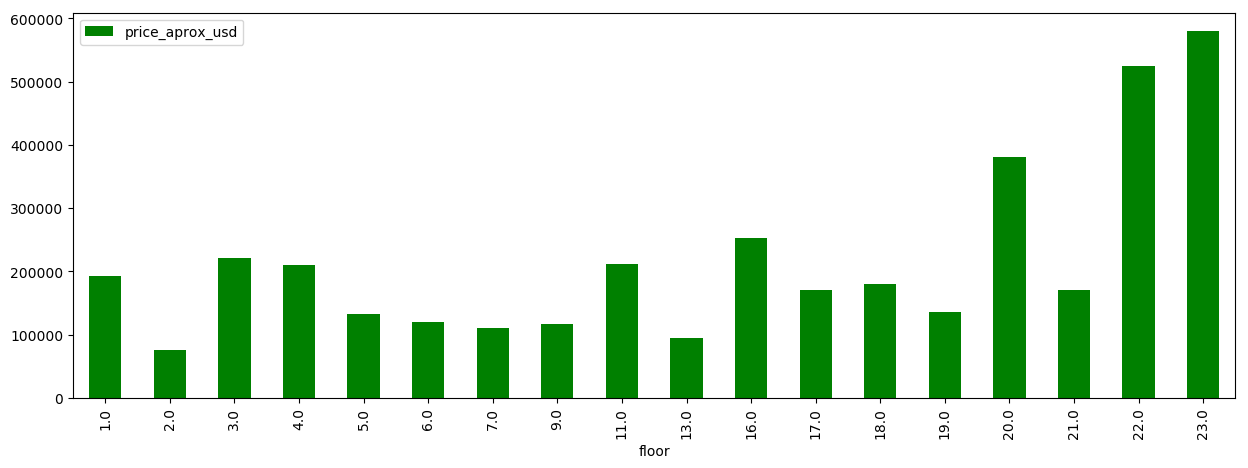

In [116]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['floor'])
edif = prop.dropna(subset=['price_usd_per_m2'])
departamento = edif['property_type'] == "apartment"
#capital = edif['state_name'] == "Capital Federal"
barrio = edif['place_name'] == 'Retiro'
menos100=edif['floor'] < 40
mas15=edif['floor'] > 0
res=edif[barrio&departamento&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res.groupby('floor').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='green' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)


# comparacion de precios en las distintas zonas del conurbano y capital
# respecto de los diferentes tipos de propiedades


In [ ]:
# para todos las zonas cuales propiedades son mas costosas de media
propiedades = prop[['state_name','place_name','price_aprox_usd','property_type']]\
.groupby('property_type').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
propiedades.plot(kind='bar', rot=70, figsize=(10,6), color='yellow', fontsize=10, grid=False);
plt.title('media del precio para cada tipo de propiedad', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('tipo de propiedad', fontsize=17);

In [142]:
#en este grafico podemos observar la cantidad de propiedades de cada tipo que nos cedio properati

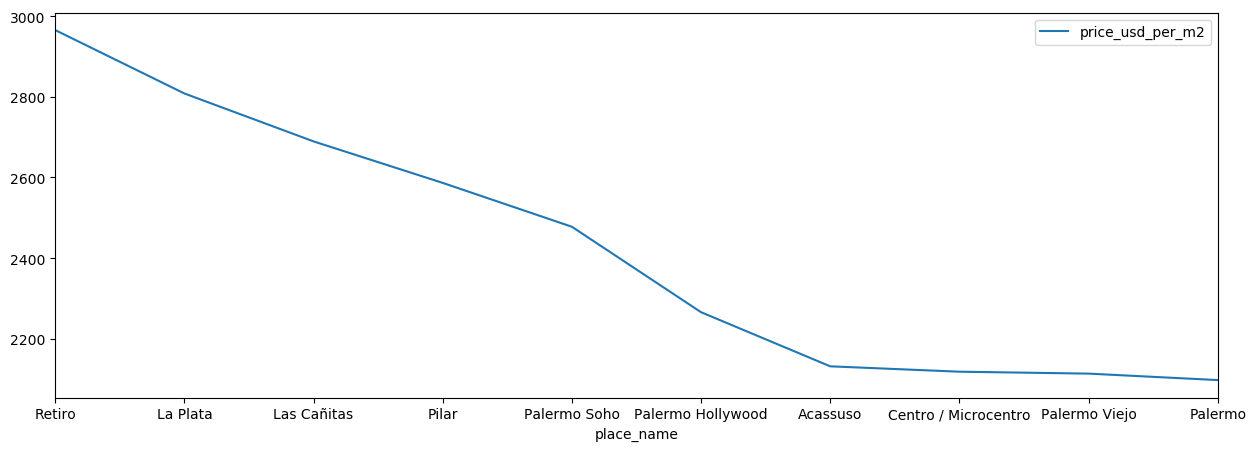

In [131]:
#los lugares con los ph mas costosos por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('place_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).head(10).plot()

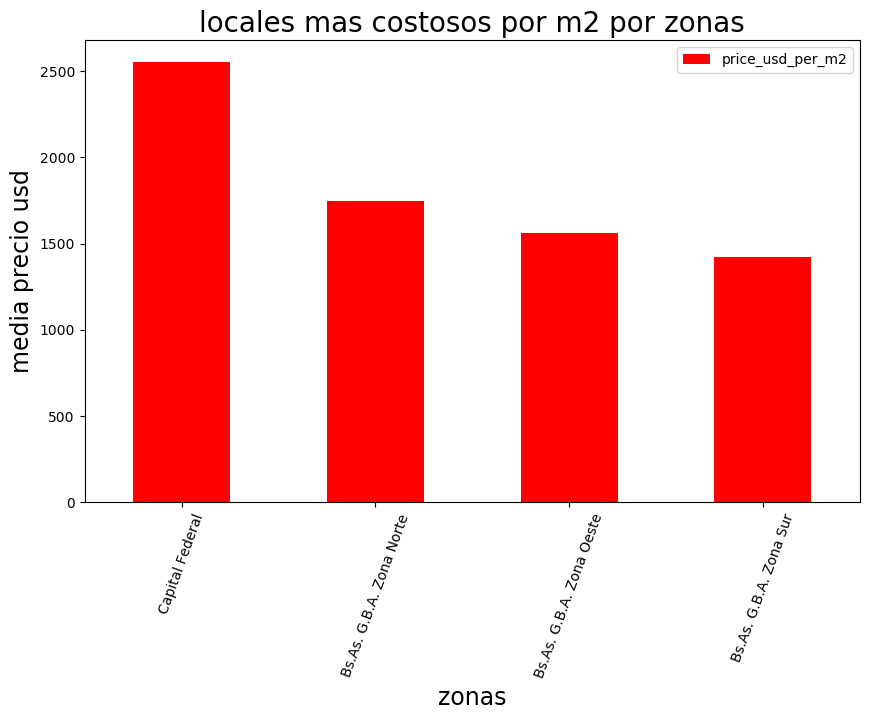

In [143]:
#los lugares con las casas mas costosas por m2
esPH=prop['property_type']=="store"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('locales mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [144]:
#podemos observar que los locales mas costosos se encuentran en capital federal y que en los otros
#tres distritos los precios son bastantes parecidos

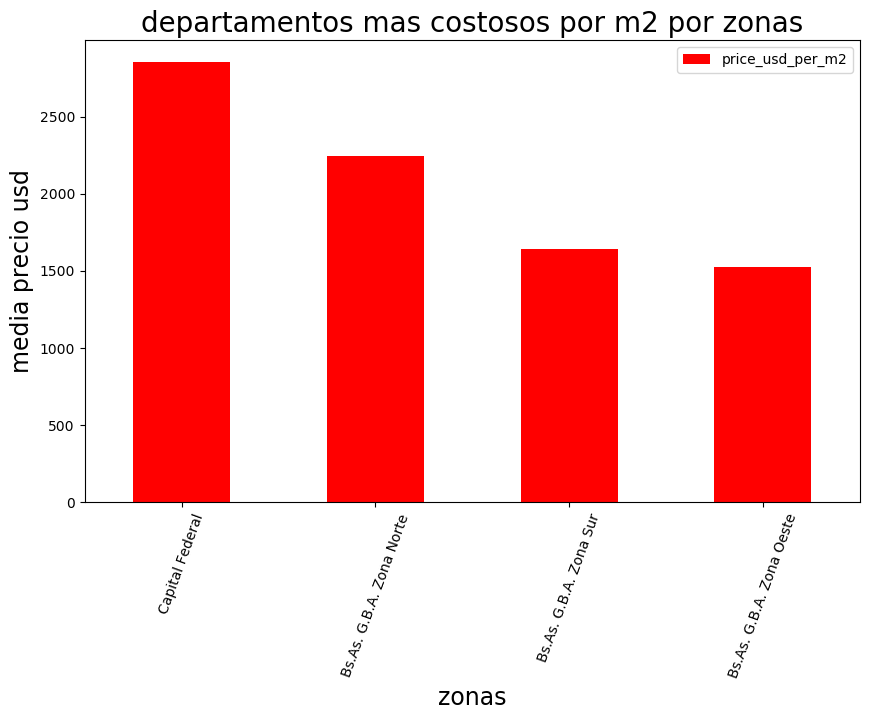

In [149]:
#los lugares con los departamentos mas costosas por m2
esPH=prop['property_type']=="apartment"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('departamentos mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [150]:
#nuevamente observamos que capital posee los departamentos mas costosos as como zona sur y oeste posee precios similares

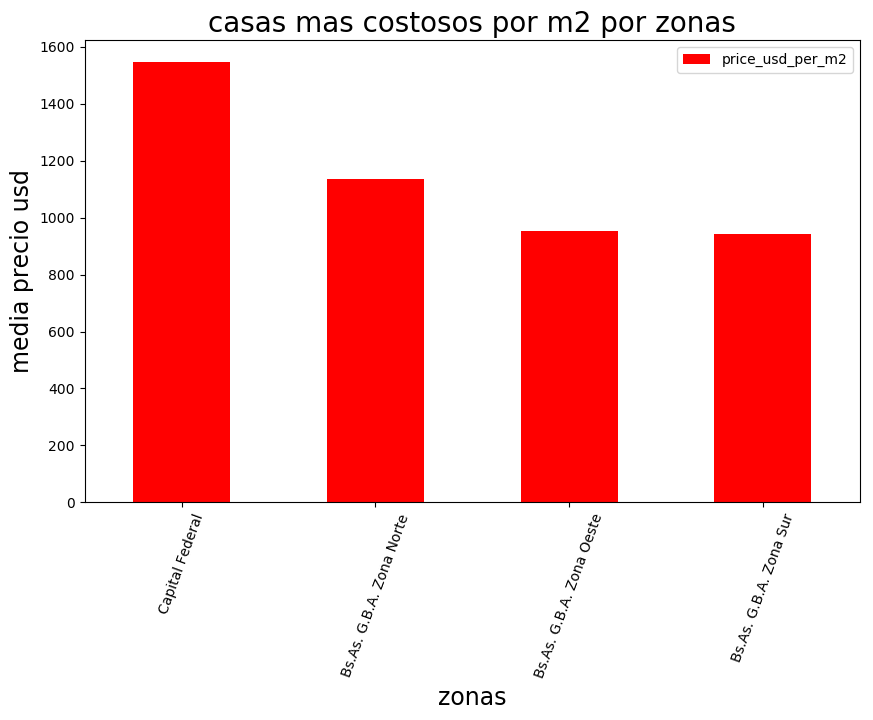

In [152]:
#los lugarares con las casas mas costosas por m2
esPH=prop['property_type']=="house"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('casas mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [154]:
#respecto al precio de las casas capital tambien lleva una ventaja apreciable respecto a los demas distritos

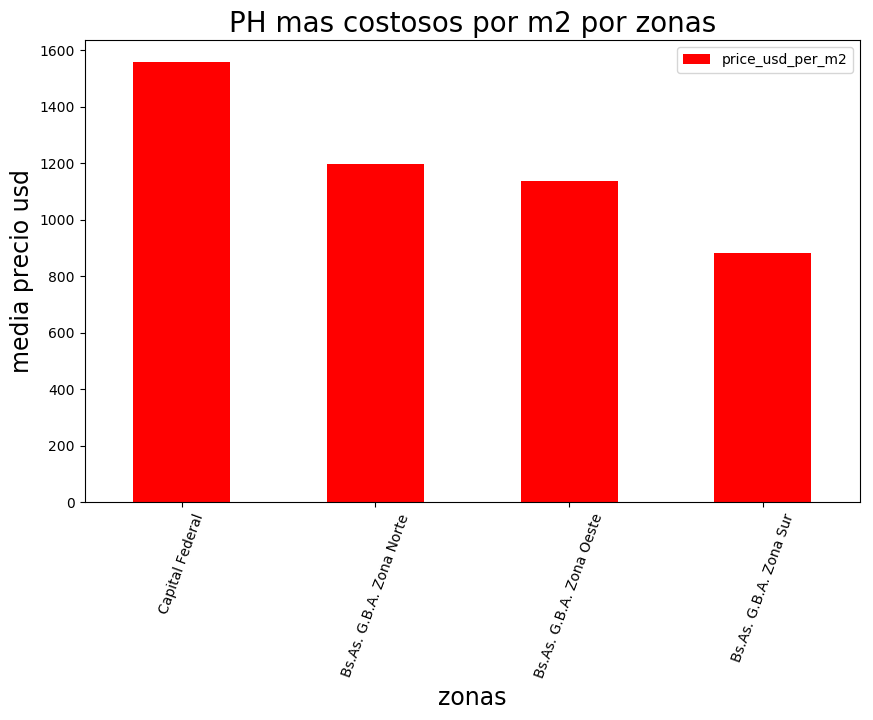

In [156]:
#los lugarares con los PH mas costosas por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('PH mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [158]:
#es este caso podemos observar que los precios mas elevados son en capital y que en zona norte y oeste los precios 
#son similares

# como afecta el precio caracteristicas nombradas en la descripcion



In [172]:
# ¿en una misma zona en este caso benavidez como cambia el precio si la casa posee pileta?
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})



,price_aprox_usd
place_name,
San Isidro,310391.658209


In [176]:
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_sin_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_sin_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
San Isidro,270894.288323


In [177]:
#podemos observar en el barrio de san isidro como el precio pomedio de las propiedades aumento 
# 40000usd cuando la casa tiene pileta

In [180]:
#mismo analisis anterior pero en el barrio de benavidez
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,269835.616438


In [188]:
#propiedades sin pileta benavidez
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,267934.381551


In [189]:
#notamos que en benavidez la diferencia de precio de casas con y sin pileta 
#es menor que en san isidro 

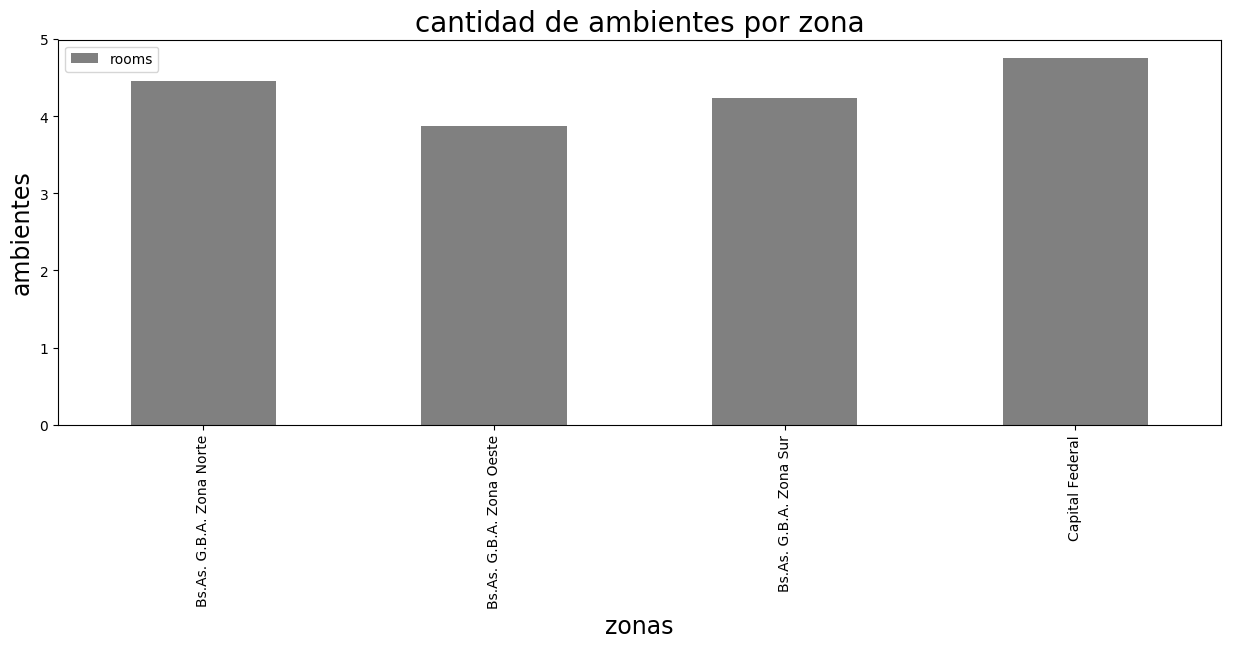

In [204]:
#¿que zona posee la media de mayor cantidad de ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"

res=edif[casa][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('state_name').agg({'rooms':'mean'}).plot(kind = 'bar',color='grey' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('cantidad de ambientes por zona', fontsize=20);
plt.ylabel('ambientes', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [205]:
#la media de ambientes por zona es de entre 4 y 5 ambientes

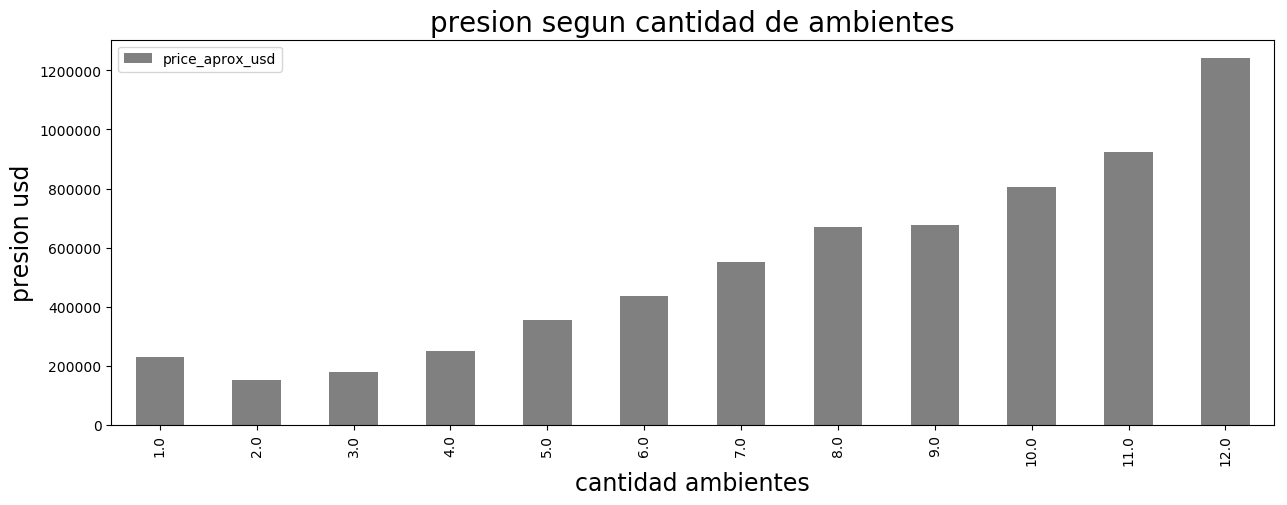

In [212]:
#¿precio por cantidad ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
edif = prop.dropna(subset=['rooms'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"
ambientes = edif['rooms'] < 13
noambientes0 = edif['rooms'] > 0
res=edif[noambientes0 & casa & ambientes][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('rooms').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='grey' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('presion segun cantidad de ambientes', fontsize=20);
plt.ylabel('presion usd', fontsize=17);
plt.xlabel('cantidad ambientes', fontsize=17);

In [ ]:
#a medida que aumentan la cantidad de ambientes tambien aumenta el precio de la propiedad